In [2]:
import matplotlib.pyplot as plt
import torch

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16

In [3]:
def extract_accuracy_from_file(file_path):
    """
    Extracts the accuracy value from a specified file.
    
    Args:
    file_path (str): The path to the file containing the accuracy information.
    
    Returns:
    float: The accuracy value extracted from the file, or None if not found.
    """
    accuracy = None
    try:
        with open(file_path, 'r') as file:
            for line in file:
                if 'Accuracy:' in line:
                    # This splits the line at 'Accuracy:' and takes the second part,
                    # then splits again at '/' to get the first part which contains the accuracy number,
                    # and strips parentheses and percentage sign before converting to float.
                    accuracy = float(line.split('Accuracy:')[1].split('/')[0].strip().split('%')[0].strip())
                    break
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    return accuracy

##Baseline Accuracy

In [ ]:
##for 2d 


model_names = ['resnet18', 'densenet40', 'vgg8']
modes = ['normal']
attack_names= ['input_base_attack']
configs = ['20_80','50_50','80_20', 'special']
for model_name in model_names:
    accuracy_data = {}
    print(model_name)
    for mode in modes:
        
        for attack_no,attack_name in enumerate(attack_names):
            for config_no,config in enumerate(configs):
                path = f'results_bs2/{attack_name}/{model_name}/{config}/accuracy_output_{mode}.txt'
                
                accuracy_data[f'{config}'] = round(extract_accuracy_from_file(path)/100,2)
                print(accuracy_data[f'C_{config_no}'])
        print(accuracy_data)
    
        torch.save(accuracy_data, f'baseline_acc/accuracy_data_{model_name}.pt')

resnet18
93.14
93.47
93.72
93.49
File not found.


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [ ]:
##for 3d 
modes= ['normal']
model_names = ['resnet18','vgg16','densenet121','densenet40', 'alexnet', 'lenet', 'vgg8']
attack_names = ['input_based_attack'] 
configs  = ['20_80', '50_50', '80_20']
flp_configs = ["top_tim", "top_wo_tim", "bottom_tim", "bottom_wo_tim"]
colors = ['blue', 'orange', 'green', 'red']


    
for model_name in model_names:
    accuracy_data = {}
    for mode in modes:
        
        for attack_no,attack_name in enumerate(attack_names):
            for config_no,config in enumerate(configs):
                accuracy_data[f'{config}'] = {}
                for flp_config in flp_configs:
                    path = f'results_3d_bs2/{attack_name}/{model_name}/{config}/{flp_config}/accuracy_output_{mode}.txt'
                    
                    accuracy_data[f'{config}'][f'{flp_config}'] = round(extract_accuracy_from_file(path)/100,2)
                    print(accuracy_data[f'{config}'])
        print(accuracy_data)
    
        torch.save(accuracy_data, f'baseline_acc/accuracy_data_{model_name}_3d.pt')

{'top_tim': 83.35}
{'top_tim': 83.35, 'top_wo_tim': 93.77}
{'top_tim': 83.35, 'top_wo_tim': 93.77, 'bottom_tim': 83.51}
{'top_tim': 83.35, 'top_wo_tim': 93.77, 'bottom_tim': 83.51, 'bottom_wo_tim': 90.19}
{'top_tim': 84.84}
{'top_tim': 84.84, 'top_wo_tim': 93.92}
{'top_tim': 84.84, 'top_wo_tim': 93.92, 'bottom_tim': 78.13}
{'top_tim': 84.84, 'top_wo_tim': 93.92, 'bottom_tim': 78.13, 'bottom_wo_tim': 89.98}
{'top_tim': 89.4}
{'top_tim': 89.4, 'top_wo_tim': 93.46}
{'top_tim': 89.4, 'top_wo_tim': 93.46, 'bottom_tim': 87.67}
{'top_tim': 89.4, 'top_wo_tim': 93.46, 'bottom_tim': 87.67, 'bottom_wo_tim': 92.52}
{'20_80': {'top_tim': 83.35, 'top_wo_tim': 93.77, 'bottom_tim': 83.51, 'bottom_wo_tim': 90.19}, '50_50': {'top_tim': 84.84, 'top_wo_tim': 93.92, 'bottom_tim': 78.13, 'bottom_wo_tim': 89.98}, '80_20': {'top_tim': 89.4, 'top_wo_tim': 93.46, 'bottom_tim': 87.67, 'bottom_wo_tim': 92.52}}
{'top_tim': 73.49}
{'top_tim': 73.49, 'top_wo_tim': 91.76}
{'top_tim': 73.49, 'top_wo_tim': 91.76, 'bott

In [39]:
##for 2d 
modes= ['attacker']
model_names = ['resnet18','densenet40', 'vgg8', 'vgg16']
attack_names = ['input_based_attack', 'weight_based_attack', 'weight_input_based_attack'] 
configs  = ['20_80', '50_50', '80_20', 'special']
colors = ['blue', 'orange', 'green', 'red']
baseline_path = 'baseline_acc' #/accuracy_data_{model_name}.pt'

    
for model_name in model_names:
    accuracy_data = {}
    delta_accuracy = {}
    baseline_accuracy = torch.load(f'{baseline_path}/accuracy_data_{model_name}.pt')
    for mode in modes:
        
        for attack_no,attack_name in enumerate(attack_names):
            for config_no,config in enumerate(configs):
                path = f'results/{attack_name}/{model_name}/{config}/accuracy_output_{mode}.txt'
                print(extract_accuracy_from_file(path)/100,2)
                accuracy_data[f'A_{attack_no}_C_{config_no}'] = round(extract_accuracy_from_file(path)/100,2)
                print(accuracy_data[f'A_{attack_no}_C_{config_no}'])
                delta_accuracy[f'A_{attack_no}_C_{config_no}'] = -accuracy_data[f'A_{attack_no}_C_{config_no}'] + baseline_accuracy[f'{config}']
   
        torch.save(accuracy_data, f'accuracy/accuracy_data_{model_name}_{mode}.pt')
        torch.save(delta_accuracy, f'accuracy/delta_accuracy_{model_name}_{mode}.pt')
    print(accuracy_data)
    print(delta_accuracy)

80.85 2
80.85
92.65 2
92.65
93.51 2
93.51
92.66 2
92.66
81.91 2
81.91
92.72 2
92.72
93.5 2
93.5
92.77 2
92.77
54.25 2
54.25
91.73 2
91.73
93.39 2
93.39
91.3 2
91.3
{'A_0_C_0': 80.85, 'A_0_C_1': 92.65, 'A_0_C_2': 93.51, 'A_0_C_3': 92.66, 'A_1_C_0': 81.91, 'A_1_C_1': 92.72, 'A_1_C_2': 93.5, 'A_1_C_3': 92.77, 'A_2_C_0': 54.25, 'A_2_C_1': 91.73, 'A_2_C_2': 93.39, 'A_2_C_3': 91.3}
{'A_0_C_0': 12.210000000000008, 'A_0_C_1': 0.789999999999992, 'A_0_C_2': 0.21999999999999886, 'A_0_C_3': 0.8299999999999983, 'A_1_C_0': 11.150000000000006, 'A_1_C_1': 0.7199999999999989, 'A_1_C_2': 0.23000000000000398, 'A_1_C_3': 0.7199999999999989, 'A_2_C_0': 38.81, 'A_2_C_1': 1.7099999999999937, 'A_2_C_2': 0.3400000000000034, 'A_2_C_3': 2.1899999999999977}
26.65 2
26.65
80.58 2
80.58
86.32 2
86.32
83.36 2
83.36
27.4 2
27.4
81.06 2
81.06
86.37 2
86.37
83.7 2
83.7
16.22 2
16.22
66.82 2
66.82
86.02 2
86.02
75.36 2
75.36
{'A_0_C_0': 26.65, 'A_0_C_1': 80.58, 'A_0_C_2': 86.32, 'A_0_C_3': 83.36, 'A_1_C_0': 27.4, 'A_1_C

/tmp/ipykernel_38740/1508372306.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  baseline_accuracy = torch.load(f'{baseline_path}/accuracy_data_{model_name}.pt')


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_model_data(data, plot_type="heatmap", title="Model Data Visualization"):
    """
    Visualize data for a model using different plot types.
    
    Parameters:
    - data (dict): Dictionary with keys encoding two categorical variables (e.g., 'A_0_C_0') 
                   and values as numerical data.
    - plot_type (str): Type of plot to generate. Options are "heatmap", "bar", "line".
    - title (str): Title for the plot.
    """
    # Parse the data to extract rows (A) and columns (C)
    categories_a = sorted(set(key.split('_')[1] for key in data.keys()))  # A categories
    categories_c = sorted(set(key.split('_')[3] for key in data.keys()))  # C categories
    
    # Create a 2D array for the data
    values = np.zeros((len(categories_a), len(categories_c)))
    for key, value in data.items():
        a, c = map(int, [key.split('_')[1], key.split('_')[3]])
        values[a, c] = value
    
    # Visualization
    if plot_type == "heatmap":
        plt.figure(figsize=(5, 6))
        sns.heatmap(values, annot=True, cmap='viridis', fmt=".2f", 
                    xticklabels=[f'C{c+1}' for c in range(len(categories_c))], 
                    yticklabels=[f'A{a+1}' for a in range(len(categories_a))])
        plt.xlabel('Floorplan configurations')
        plt.ylabel('Attack patterns')
        plt.tight_layout()
        # plt.title(title)
        # plt.show()
    
    elif plot_type == "bar":
        x = np.arange(len(categories_c))  # Position of C categories
        width = 0.25  # Bar width
        plt.figure(figsize=(10, 6))
        
        for i, category in enumerate(categories_a):
            plt.bar(x + i * width, values[i], width, label=f'A_{category}')
        
        plt.xticks(x + width, [f'C{c+1}' for c in categories_c])
        plt.xlabel('Floorplan configurations')
        plt.ylabel('Values')
        plt.title(title)
        plt.legend(title='A Categories')
        plt.tight_layout()
        # plt.show()
    
    elif plot_type == "line":
        plt.figure(figsize=(10, 6))
        
        for i, category in enumerate(categories_a):
            plt.plot([f'C_{c}' for c in categories_c], values[i], marker='o', label=f'A_{category}')
        
        plt.xlabel('C Categories')
        plt.ylabel('Values')
        plt.title(title)
        plt.legend(title='A Categories')
        plt.grid(visible=True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        # plt.show()
    
    
    
    else:
        raise ValueError("Invalid plot_type. Choose from 'heatmap', 'bar', or 'line'.")

    plt.savefig(f'accuracy/{title}.png', dpi=300)
    plt.show()


/tmp/ipykernel_38740/4034526029.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(f'accuracy/delta_accuracy_{model_name}_{mode}.pt')


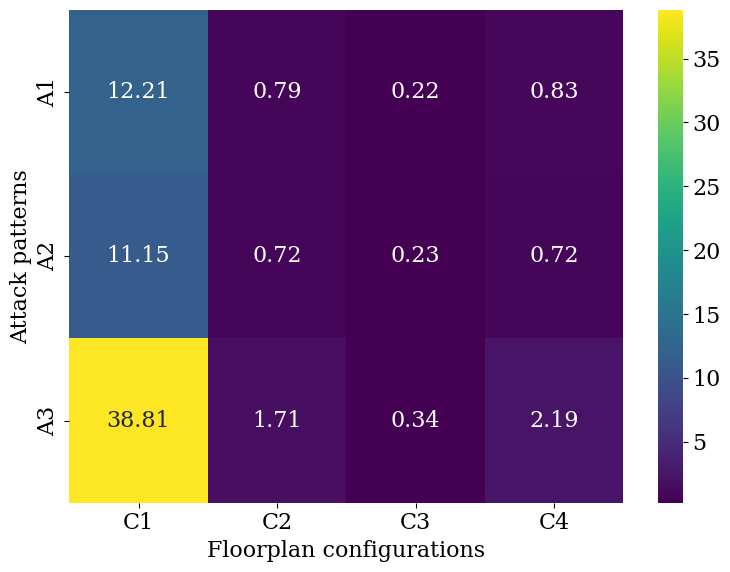

/tmp/ipykernel_38740/4034526029.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(f'accuracy/delta_accuracy_{model_name}_{mode}.pt')


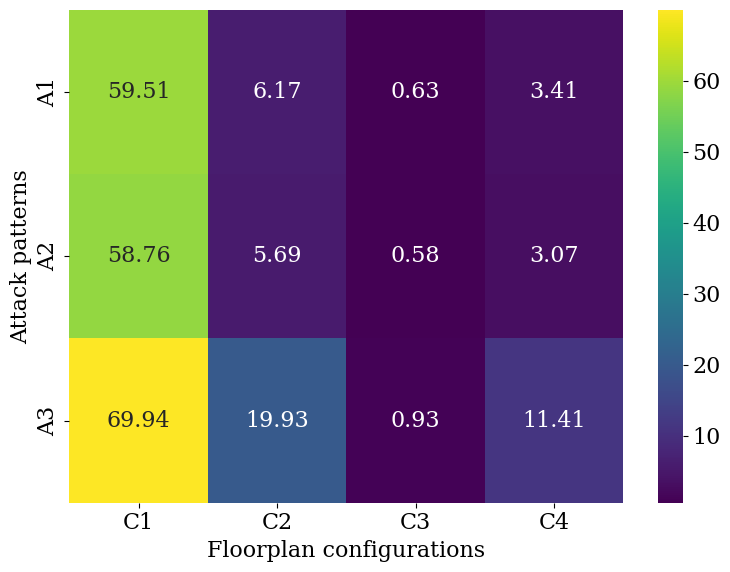

/tmp/ipykernel_38740/4034526029.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(f'accuracy/delta_accuracy_{model_name}_{mode}.pt')


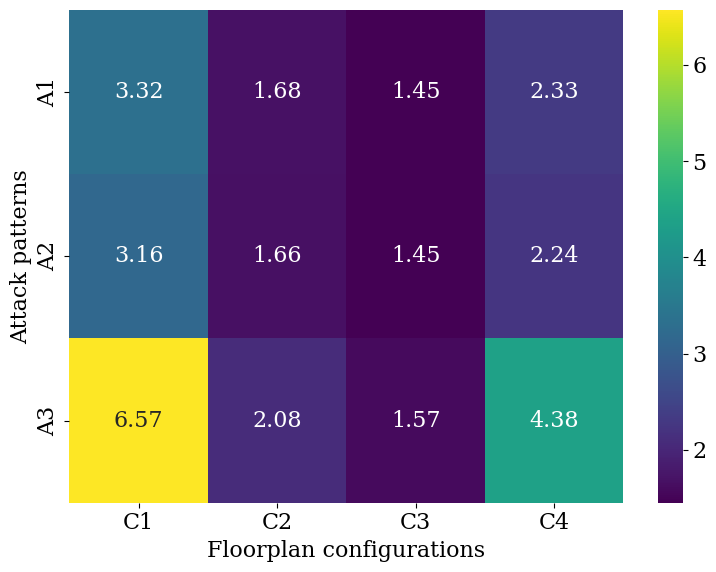

/tmp/ipykernel_38740/4034526029.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(f'accuracy/delta_accuracy_{model_name}_{mode}.pt')


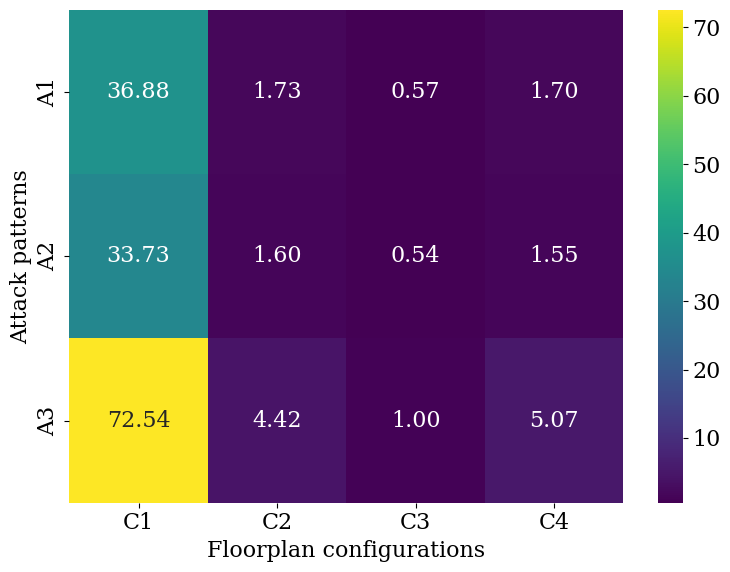

In [41]:
for model_name in model_names:
    for mode in modes:
        data = torch.load(f'accuracy/delta_accuracy_{model_name}_{mode}.pt')
        visualize_model_data(data, plot_type="heatmap", title=f'{model_name}_Accuracy_drop')

In [49]:
##for 3d
attack_names = ['input_based_attack', 'weight_based_attack', 'weight_input_based_attack'] 

tile_configs = ["50_50"]
flp_configs = ["top_wo_tim", "bottom_wo_tim"]
model_names = ['resnet18', 'vgg8','densenet40', 'vgg16']
modes = ['attacker']
# baseline_path = 'baseline_acc/accuracy_data_'
for model_name in model_names:
    accuracy_data = {}
    delta_accuracy = {}
    baseline_path = f'baseline_acc/accuracy_data_{model_name}_3d.pt'
    baseline_accuracy = torch.load(baseline_path)
    for mode in modes:
        for attack_no,attack_name in enumerate(attack_names):
            for config_no,config in enumerate(tile_configs):
                for attack_no_flp, attack_name_flp in enumerate(flp_configs):
                    if 'top' in attack_name_flp:
                        flp_name = 'top'
                    else:
                        flp_name = 'bottom'
                    path = f'results3d/{attack_name}/{model_name}/{config}/{attack_name_flp}/accuracy_output_{mode}.txt'
                    print(path)
                    accuracy_data[f'A_{attack_no}_C_{flp_name}'] = round(extract_accuracy_from_file(path)/100,2)
                    delta_accuracy[f'A_{attack_no}_C_{flp_name}'] = abs(-accuracy_data[f'A_{attack_no}_C_{flp_name}'] + baseline_accuracy[f'{config}'][f'{attack_name_flp}'])
    
    
        torch.save(accuracy_data, f'accuracy_data_3d_{model_name}_{mode}.pt')
        torch.save(delta_accuracy, f'delta_accuracy_3d_{model_name}_{mode}.pt')
    print(accuracy_data)
    print(delta_accuracy)

results3d/input_based_attack/resnet18/50_50/top_wo_tim/accuracy_output_attacker.txt
results3d/input_based_attack/resnet18/50_50/bottom_wo_tim/accuracy_output_attacker.txt
results3d/weight_based_attack/resnet18/50_50/top_wo_tim/accuracy_output_attacker.txt
results3d/weight_based_attack/resnet18/50_50/bottom_wo_tim/accuracy_output_attacker.txt
results3d/weight_input_based_attack/resnet18/50_50/top_wo_tim/accuracy_output_attacker.txt
results3d/weight_input_based_attack/resnet18/50_50/bottom_wo_tim/accuracy_output_attacker.txt
{'A_0_C_top': 89.79, 'A_0_C_bottom': 89.79, 'A_1_C_top': 93.66, 'A_1_C_bottom': 74.39, 'A_2_C_top': 93.47, 'A_2_C_bottom': 37.47}
{'A_0_C_top': 4.1299999999999955, 'A_0_C_bottom': 0.18999999999999773, 'A_1_C_top': 0.2600000000000051, 'A_1_C_bottom': 15.590000000000003, 'A_2_C_top': 0.45000000000000284, 'A_2_C_bottom': 52.510000000000005}
results3d/input_based_attack/vgg8/50_50/top_wo_tim/accuracy_output_attacker.txt
results3d/input_based_attack/vgg8/50_50/bottom_wo_t

/tmp/ipykernel_38740/3863144341.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  baseline_accuracy = torch.load(baseline_path)


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_model_data_top_bottom(data, plot_type="heatmap", title="Model Data Visualization"):
    """
    Visualize data for a model using different plot types, handling 'top' and 'bottom' categories.
    
    Parameters:
    - data (dict): Dictionary with keys encoding 'A' categories and 'top'/'bottom' subcategories,
                   and values as numerical data.
    - plot_type (str): Type of plot to generate. Options are "heatmap", "bar", "line".
    - title (str): Title for the plot.
    """
    # Parse the data to extract rows (A) and columns (C: top, bottom)
    categories_a = sorted(set(key.split('_')[1] for key in data.keys()))  # A categories
    categories_c = ['top', 'bottom']  # Fixed categories for C

    # Create a 2D array for the data
    values = np.zeros((len(categories_a), len(categories_c)))
    for key, value in data.items():
        a = int(key.split('_')[1])
        c = key.split('_')[3]  # 'top' or 'bottom'
        c_index = categories_c.index(c)
        values[a, c_index] = value

    # Visualization
    if plot_type == "heatmap":
        plt.figure(figsize=(5, 6))
        sns.heatmap(values, annot=True, cmap='coolwarm', fmt=".2f", 
                    xticklabels=categories_c, 
                    yticklabels=[f'A{a+1}' for a in range(len(categories_a))])
        plt.xlabel('Floorplan configurations')
        plt.ylabel('Attack patterns')
        # plt.title(title)
        # plt.show()
    
    elif plot_type == "bar":
        x = np.arange(len(categories_a))  # Position of A categories
        width = 0.4  # Bar width
        plt.figure(figsize=(10, 6))
        
        for i, c in enumerate(categories_c):
            plt.bar(x + i * width, values[:, i], width, label=f'C_{c}')
        
        plt.xticks(x + width / 2, [f'A{a+1}' for a in range(len(categories_a))])
        plt.xlabel('Attack patterns')
        plt.ylabel('Accuracy drop (%)')
        # plt.title(title)
        plt.legend(title='Floorplan configurations')
        plt.tight_layout()
        # plt.show()
    
    elif plot_type == "line":
        plt.figure(figsize=(10, 6))
        
        for i, c in enumerate(categories_c):
            plt.plot([f'A_{a}' for a in categories_a], values[:, i], marker='o', label=f'C_{c}')
        
        plt.xlabel('A Categories')
        plt.ylabel('Values')
        plt.title(title)
        plt.legend(title='C Categories')
        plt.grid(visible=True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    
    else:
        raise ValueError("Invalid plot_type. Choose from 'heatmap', 'bar', or 'line'.")

    plt.savefig(f'accuracy/{title}.png', dpi=300)
    plt.show()


/tmp/ipykernel_38740/1520254519.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(f'delta_accuracy_3d_{model_name}_{mode}.pt')


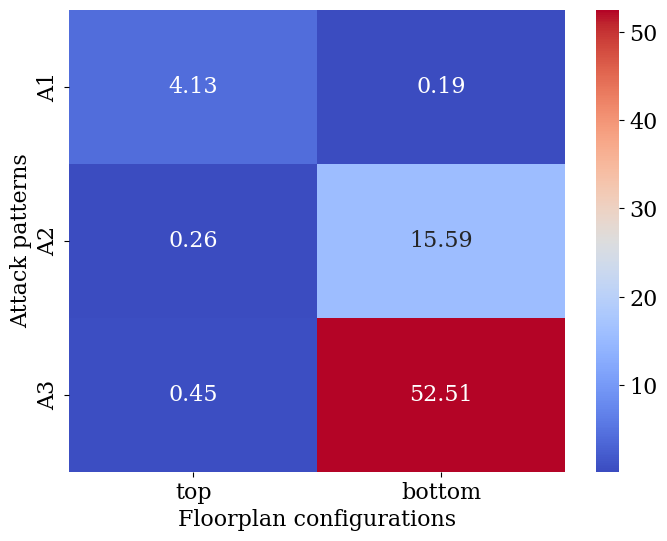

/tmp/ipykernel_38740/1520254519.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(f'delta_accuracy_3d_{model_name}_{mode}.pt')


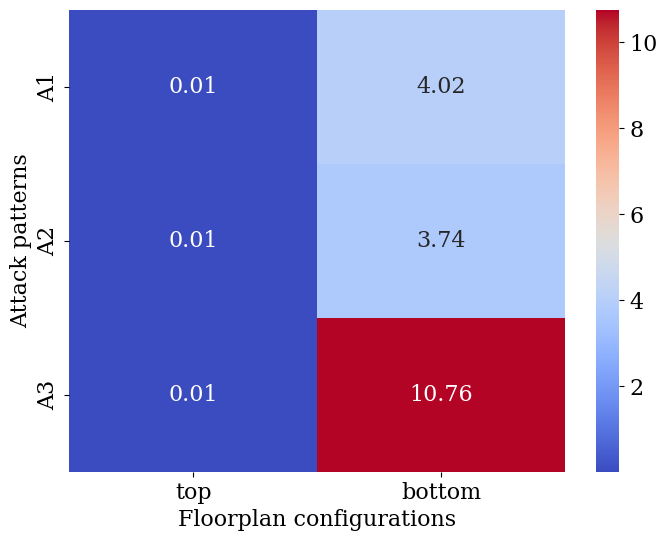

/tmp/ipykernel_38740/1520254519.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(f'delta_accuracy_3d_{model_name}_{mode}.pt')


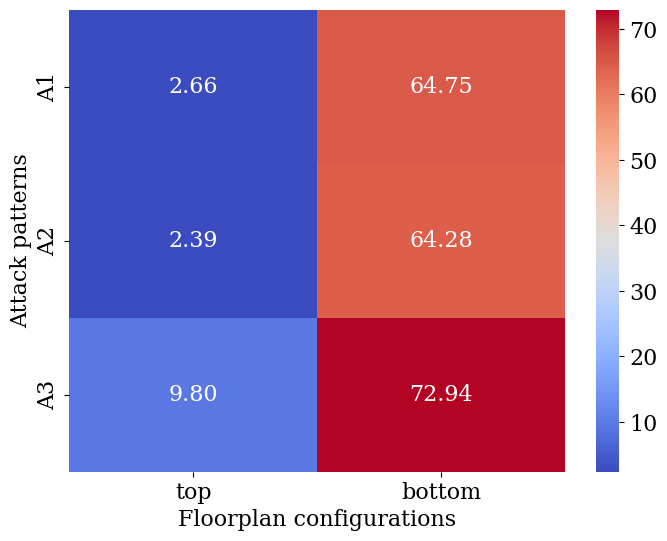

/tmp/ipykernel_38740/1520254519.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(f'delta_accuracy_3d_{model_name}_{mode}.pt')


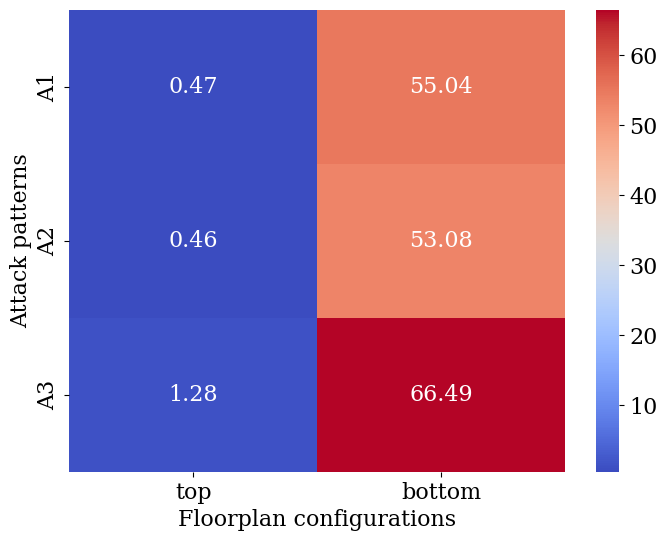

In [52]:
for model_name in model_names:
    for mode in modes:
        data = torch.load(f'delta_accuracy_3d_{model_name}_{mode}.pt')
        visualize_model_data_top_bottom(data, plot_type="heatmap", title=f'{model_name}_Accuracy_drop_3d')

In [ ]:
modes= ["attacker"]
model_names = ['resnet18','vgg16','densenet40','vgg8']
attack_names = ['input_based_attack', "weight_based_attack", "weight_input_based_attack"] 
configs  = ['20_80', '50_50', '80_20', 'special']
colors = ['blue', 'orange', 'green', 'red']

baseline_path = "./results_bs2/input_based_attack/"
attacker_path = "./results/"
attacker_path_2d = "./results_bs2/"

##Read the temperatures of each tile find avg temperature and max and min temperature

import os
import numpy as np

delta_temp = {}
# for mode in modes:
for model_name in model_names:
    delta_temp[model_name] = {}
    for attack_name in attack_names:
        if attack_name == "input_based_attack":
             attack_config = 'A1'
             attack_config_type2 = 'A2'
        elif attack_name == "weight_based_attack":
                attack_config = 'A2'
        elif attack_name == "weight_input_based_attack":
                attack_config = 'A3'
        delta_temp[model_name][attack_config] = {}
        ##add attack_config_type2 key also 
        # if attack_name == 'input_based_attack':
        #     delta_temp[model_name][attack_config_type2] = {}
        for config in configs:
            if config == '20_80':
                config_name = 'C1'
            elif config == '50_50':
                config_name = 'C2'
            elif config == '80_20':
                config_name = 'C3'
            elif config == 'special':
                config_name = 'C4'
            # delta_temp[model_name][attack_config][config_name] = {}
            baseline_path_1 = baseline_path+f"{model_name}/{config}/new_tile_temp_normal.pt"
            attacker_path_1 = attacker_path+f"{attack_name}/{model_name}/{config}/new_tile_temp_attacker.pt"
            # if attack_name == 'input_based_attack':
            #     ##add this key to dict
            #     attacker_path_2 = attacker_path_2d+f"{attack_name}/{model_name}/{config}/new_tile_temp_attacker.pt"
            #     attack_tile_temp_2 = torch.load(attacker_path_2)
            #     baseline_tile_temp_2 = torch.load(baseline_path_1)
            #     ## attack are sublists. Creare a list of all the tiles
            #     all_tiles_attack_2 = []
            #     all_tiles_baseline_2 = []
            #     for i in range(len(attack_tile_temp_2)):
            #         all_tiles_attack_2.extend(attack_tile_temp_2[i])
            #         all_tiles_baseline_2.extend(baseline_tile_temp_2[i])
            #     ##Find the change
            #     delta_temp_lis_2 = [all_tiles_attack_2[i] - all_tiles_baseline_2[i] for i in range(len(all_tiles_attack_2))]
            #     avg_temp_2 = np.mean(delta_temp_lis_2)
            #     max_temp_2 = max(delta_temp_lis_2)
            #     min_temp_2 = min(delta_temp_lis_2)
            attack_tile_temp = torch.load(attacker_path_1)
            baseline_tile_temp = torch.load(baseline_path_1)
            ## attack are sublists. Creare a list of all the tiles
            all_tiles_attack = []
            all_tiles_baseline = []
            for i in range(len(attack_tile_temp)):
                all_tiles_attack.extend(attack_tile_temp[i])
                all_tiles_baseline.extend(baseline_tile_temp[i])
            ##Find the change
            delta_temp_lis = [abs(all_tiles_attack[i] - all_tiles_baseline[i]) for i in range(len(all_tiles_attack))]
            avg_temp = np.mean(delta_temp_lis)
            max_temp = max(delta_temp_lis)
            min_temp = min(delta_temp_lis)
            delta_temp[model_name][attack_config][config_name] = (avg_temp, max_temp, min_temp)
            # if attack_name == 'input_based_attack':
            #     print("here")
            #     delta_temp[model_name][attack_config_type2][config_name] = (avg_temp_2, max_temp_2, min_temp_2)


torch.save(delta_temp, 'delta_temp.pt')
print(delta_temp)

{'resnet18': {'A1': {'C1': (17.273170731707317, 21.789999999999964, 14.170000000000016), 'C2': (4.877073170731711, 9.089999999999975, 3.4499999999999886), 'C3': (1.841463414634149, 4.519999999999982, 0.9900000000000091), 'C4': (3.2973170731707357, 6.020000000000039, 0.2699999999999818)}, 'A2': {'C1': (16.58951219512196, 20.930000000000007, 13.600000000000023), 'C2': (4.648292682926832, 8.669999999999959, 3.2900000000000205), 'C3': (1.750975609756094, 4.289999999999964, 0.9399999999999977), 'C4': (3.1148780487804832, 5.740000000000009, 0.06999999999999318)}, 'A3': {'C1': (28.14268292682927, 35.24000000000001, 23.24000000000001), 'C2': (8.512195121951224, 15.639999999999986, 6.100000000000023), 'C3': (3.2980487804878016, 8.239999999999952, 1.7900000000000205), 'C4': (6.563658536585367, 10.830000000000041, 2.5400000000000205)}}, 'vgg16': {'A1': {'C1': (18.47023255813954, 22.95999999999998, 15.069999999999993), 'C2': (3.820000000000005, 7.069999999999993, 2.6899999999999977), 'C3': (2.3472

/tmp/ipykernel_38740/2167553425.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  attack_tile_temp = torch.load(attacker_path_1)
/tmp/ipykernel_38740/2167553425.py:62: Fu

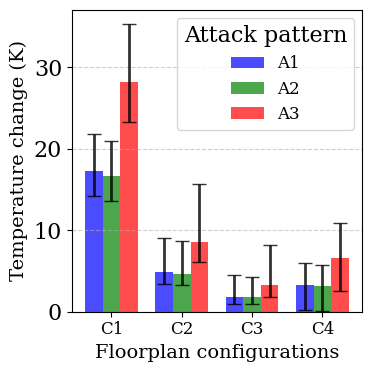

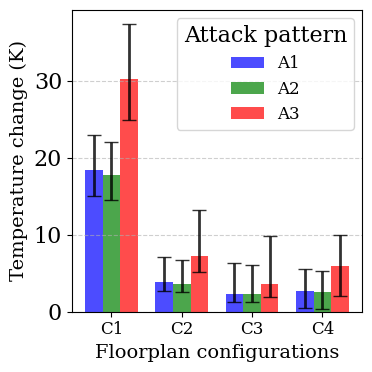

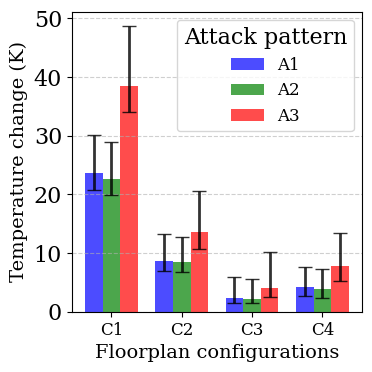

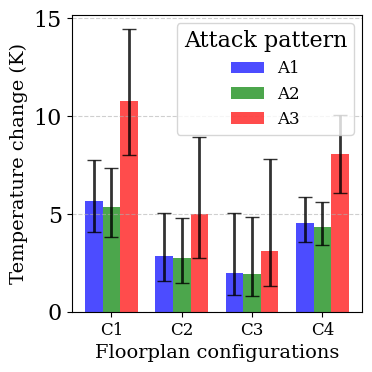

In [43]:
import matplotlib.pyplot as plt
import numpy as np
data = delta_temp

# Configuration
colors = {'A1': 'blue', 'A2': 'green', 'A3': 'red'}
bar_width = 0.25  # Width of each bar

# Plot for each model
for model, configs in data.items():
    plt.figure(figsize=(4, 4))
    # plt.title(f'Temperature Change for {model}', fontsize=16)
    plt.xlabel('Floorplan configurations', fontsize=14)
    plt.ylabel('Temperature change (K)', fontsize=14)
    
    x_positions = np.arange(len(configs['A1'].keys()))  # C Config positions (C1, C2, ...)
    
    for i, (config, c_values) in enumerate(configs.items()):
        avg_values = [c_values[c][0] for c in c_values.keys()]
        max_values = [c_values[c][1] for c in c_values.keys()]
        min_values = [c_values[c][2] for c in c_values.keys()]
        errors = [np.array(avg_values) - np.array(min_values), np.array(max_values) - np.array(avg_values)]
        
        # Bar positions adjusted for group
        bar_positions = x_positions + (i - 1) * bar_width  # Shift positions for each A config
        
        # Plot bar chart
        plt.bar(
            bar_positions,
            avg_values,
            width=bar_width,
            color=colors[config],
            label=f'{config}',
            yerr=errors,
            capsize=5,
            error_kw={'elinewidth': 2, 'alpha': 0.8},  # Thicker error lines
            alpha=0.7
        )
    
    # Adjust x-axis
    plt.xticks(x_positions, configs['A1'].keys(), fontsize=12)
    plt.legend(title='Attack pattern', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f'{model}_temperature_change_bar.png', dpi=1200)  # Save the plot
    plt.show()


##For 3D Configurations

In [47]:
modes= ["attacker"]
model_names = ['resnet18','vgg16','densenet40','vgg8']
attack_names = ['input_based_attack', "weight_based_attack", "weight_input_based_attack"] 
configs  = [ '50_50']
configs_3d = [ "top_wo_tim","bottom_wo_tim"]
colors = ['blue', 'orange', 'green', 'red']

baseline_path = "./results_3d_bs2/input_based_attack/"
attacker_path = "./results3d/"

##Read the temperatures of each tile find avg temperature and max and min temperature
##only consider wo TIM. and only TOP
import os
import numpy as np

delta_temp_3d_bot = {}
# for mode in modes:
for model_name in model_names:
    delta_temp_3d_bot[model_name] = {}
    for attack_name in attack_names:
        if attack_name == "input_based_attack":
             attack_config = 'A1'
             attack_config_type2 = 'A2'
        elif attack_name == "weight_based_attack":
                attack_config = 'A2'
        elif attack_name == "weight_input_based_attack":
                attack_config = 'A3'
        delta_temp_3d_bot[model_name][attack_config] = {}
        ##add attack_config_type2 key also 
        # if attack_name == 'input_based_attack':
        #     delta_temp[model_name][attack_config_type2] = {}
        for config in configs:
            if config == '20_80':
                config_name = 'C1'
            elif config == '50_50':
                config_name = 'C2'
            elif config == '80_20':
                config_name = 'C3'
            elif config == 'special':
                config_name = 'C4'
            for config_3d in configs_3d:
                

                if 'top' in config_3d:
                    config_name_3d = 'top'
                else:
                    config_name_3d = 'bottom'
                delta_temp_3d_bot[model_name][attack_config][config_name_3d] = {}
                # delta_temp[model_name][attack_config][config_name] = {}
                baseline_path_1 = baseline_path+f"{model_name}/{config}/{config_3d}/new_tile_temp_normal.pt"
                attacker_path_1 = attacker_path+f"{attack_name}/{model_name}/{config}/{config_3d}/new_tile_temp_attacker.pt"
                # if attack_name == 'input_based_attack':
                
                #     ##add this key to dict
                #     attacker_path_2 = attacker_path_2d+f"{attack_name}/{model_name}/{config}/new_tile_temp_attacker.pt"
                #     attack_tile_temp_2 = torch.load(attacker_path_2)
                #     baseline_tile_temp_2 = torch.load(baseline_path_1)
                #     ## attack are sublists. Creare a list of all the tiles
                #     all_tiles_attack_2 = []
                #     all_tiles_baseline_2 = []
                #     for i in range(len(attack_tile_temp_2)):
                #         all_tiles_attack_2.extend(attack_tile_temp_2[i])
                #         all_tiles_baseline_2.extend(baseline_tile_temp_2[i])
                #     ##Find the change
                #     delta_temp_lis_2 = [all_tiles_attack_2[i] - all_tiles_baseline_2[i] for i in range(len(all_tiles_attack_2))]
                #     avg_temp_2 = np.mean(delta_temp_lis_2)
                #     max_temp_2 = max(delta_temp_lis_2)
                #     min_temp_2 = min(delta_temp_lis_2)
                attack_tile_temp = torch.load(attacker_path_1)
                baseline_tile_temp = torch.load(baseline_path_1)
                ## attack are sublists. Creare a list of all the tiles
                all_tiles_attack = []
                all_tiles_baseline = []
                for i in range(len(attack_tile_temp)):
                    all_tiles_attack.extend(attack_tile_temp[i])
                    all_tiles_baseline.extend(baseline_tile_temp[i])
                ##Find the change
                delta_temp_lis = [abs(all_tiles_attack[i] - all_tiles_baseline[i]) for i in range(len(all_tiles_attack))]
                avg_temp = np.mean(delta_temp_lis)
                max_temp = max(delta_temp_lis)
                min_temp = min(delta_temp_lis)
                delta_temp_3d_bot[model_name][attack_config][config_name_3d] = (avg_temp, max_temp, min_temp)
                # if attack_name == 'input_based_attack':
                #     print("here")
                #     delta_temp[model_name][attack_config_type2][config_name] = (avg_temp_2, max_temp_2, min_temp_2)


torch.save(delta_temp_3d_bot, 'delta_temp_3d_bot.pt')
print(delta_temp_3d_bot)

{'resnet18': {'A1': {'top': (2.029512195121948, 2.0500000000000114, 2.0), 'bottom': (11.420975609756105, 12.439999999999998, 10.190000000000055)}, 'A2': {'top': (1.9043902439024332, 1.9300000000000068, 1.8799999999999955), 'bottom': (10.699024390243908, 11.699999999999989, 9.53000000000003)}, 'A3': {'top': (4.047317073170721, 4.07000000000005, 4.009999999999991), 'bottom': (22.94512195121952, 24.389999999999986, 20.680000000000007)}}, 'vgg16': {'A1': {'top': (3.054418604651166, 3.090000000000032, 3.0100000000000477), 'bottom': (16.041162790697673, 19.889999999999986, 12.829999999999984)}, 'A2': {'top': (2.886744186046509, 2.920000000000016, 2.849999999999966), 'bottom': (15.161395348837205, 18.92999999999995, 12.049999999999955)}, 'A3': {'top': (5.632790697674412, 5.689999999999998, 5.560000000000002), 'bottom': (30.02906976744186, 35.31999999999999, 25.049999999999955)}}, 'densenet40': {'A1': {'top': (6.458823529411752, 6.510000000000048, 6.369999999999948), 'bottom': (30.673676470588

/tmp/ipykernel_38740/2697891052.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  attack_tile_temp = torch.load(attacker_path_1)
/tmp/ipykernel_38740/2697891052.py:70: Fu

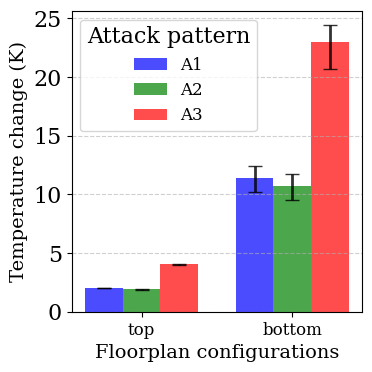

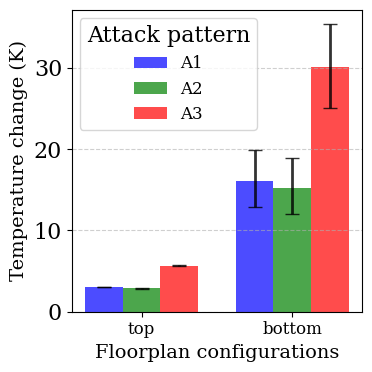

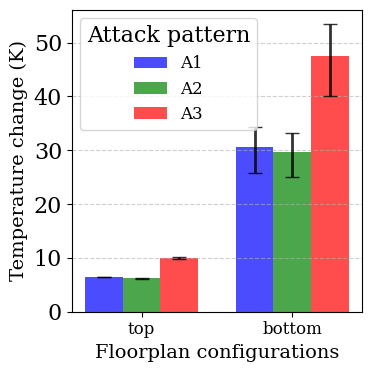

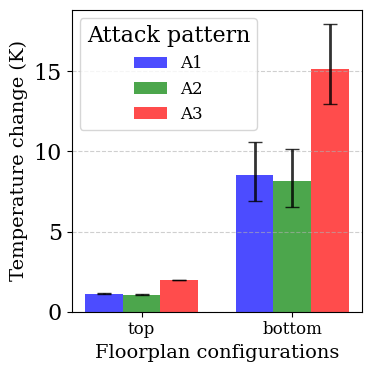

In [48]:
import matplotlib.pyplot as plt
import numpy as np
data = delta_temp_3d_bot

# Configuration
colors = {'A1': 'blue', 'A2': 'green', 'A3': 'red'}
bar_width = 0.25  # Width of each bar

# Plot for each model
for model, configs in data.items():
    plt.figure(figsize=(4, 4))
    # plt.title(f'Temperature Change for {model}', fontsize=16)
    plt.xlabel('Floorplan configurations', fontsize=14)
    plt.ylabel('Temperature change (K)', fontsize=14)
    
    x_positions = np.arange(len(configs['A1'].keys()))  # C Config positions (C1, C2, ...)
    
    for i, (config, c_values) in enumerate(configs.items()):
        avg_values = [c_values[c][0] for c in c_values.keys()]
        max_values = [c_values[c][1] for c in c_values.keys()]
        min_values = [c_values[c][2] for c in c_values.keys()]
        errors = [np.array(avg_values) - np.array(min_values), np.array(max_values) - np.array(avg_values)]
        
        # Bar positions adjusted for group
        bar_positions = x_positions + (i - 1) * bar_width  # Shift positions for each A config
        
        # Plot bar chart
        plt.bar(
            bar_positions,
            avg_values,
            width=bar_width,
            color=colors[config],
            label=f'{config}',
            yerr=errors,
            capsize=5,
            error_kw={'elinewidth': 2, 'alpha': 0.8},  # Thicker error lines
            alpha=0.7
        )
    
    # Adjust x-axis
    plt.xticks(x_positions, configs['A1'].keys(), fontsize=12)
    plt.legend(title='Attack pattern', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f'{model}_temperature_change_bar_3d.png', dpi=1200)  # Save the plot
    plt.show()
